In [2]:
import os, shutil
original_dataset_dir = 'C:/Users/ACER/Downloads/train'
base_dir = 'C:/Users/ACER/Downloads/cats_and_dogs_small'
os.mkdir(base_dir)
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [4]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [5]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [6]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [8]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [9]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [10]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [11]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [12]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [14]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

In [16]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
validation_dir,target_size=(150, 150),
batch_size=20,
class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [18]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [19]:
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=30,
validation_data=validation_generator,
validation_steps=50)

C:\Users\ACER\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 59s 576ms/step - loss: 0.7046 - acc: 0.4783 - val_loss: 0.6705 - val_acc: 0.5780
Epoch 2/30
100/100 [==============================] - 53s 528ms/step - loss: 0.6647 - acc: 0.5900 - val_loss: 0.6354 - val_acc: 0.6550
Epoch 3/30
100/100 [==============================] - 50s 499ms/step - loss: 0.6236 - acc: 0.6656 - val_loss: 0.6147 - val_acc: 0.6610
Epoch 4/30
100/100 [==============================] - 50s 501ms/step - loss: 0.5724 - acc: 0.7030 - val_loss: 0.5917 - val_acc: 0.6840
Epoch 5/30
100/100 [==============================] - 49s 494ms/step - loss: 0.5348 - acc: 0.7290 - val_loss: 0.5819 - val_acc: 0.6850
Epoch 6/30
100/100 [==============================] - 49s 495ms/step - loss: 0.5039 - acc: 0.7664 - val_loss: 0.5613 - val_acc: 0.6980
Epoch 7/30
100/100 [==============================] - 49s 492ms/step - loss: 0.4672 - acc: 0.7858 - val_loss: 0.5922 - val_acc: 0.6920
Epoch 8/30
100/100 [==============================] - 5

In [20]:
model.save('cats_and_dogs_small_1.h5')

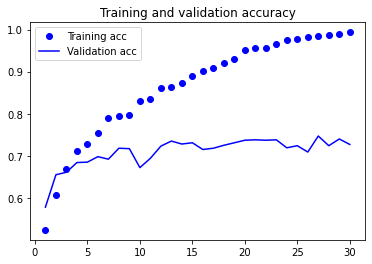

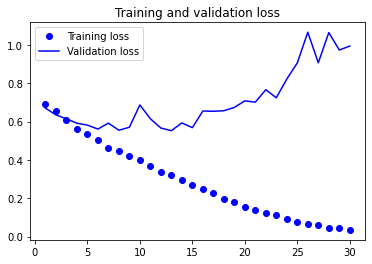

In [21]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [22]:
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

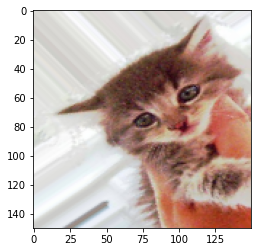

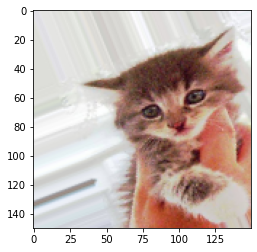

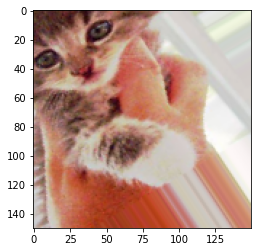

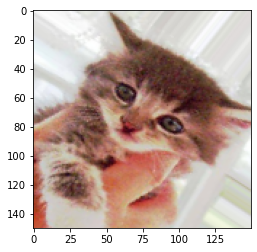

In [23]:
from keras.preprocessing import image
fnames = [os.path.join(train_cats_dir, fname) for
fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [24]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

In [28]:
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=32,
class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=32,
class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [32]:
history = model.fit_generator(
train_generator,
steps_per_epoch=50,
epochs=100,
validation_data=validation_generator,
validation_steps=50)

Epoch 1/100
50/50 [==============================] - 41s 808ms/step - loss: 0.6160 - acc: 0.6673 - val_loss: 0.6061 - val_acc: 0.6600
Epoch 2/100
50/50 [==============================] - 40s 795ms/step - loss: 0.6026 - acc: 0.6705 - val_loss: 0.5923 - val_acc: 0.6730
Epoch 3/100
50/50 [==============================] - 38s 762ms/step - loss: 0.6059 - acc: 0.6780 - val_loss: 0.5725 - val_acc: 0.6880
Epoch 4/100
50/50 [==============================] - 41s 816ms/step - loss: 0.6044 - acc: 0.6806 - val_loss: 0.6591 - val_acc: 0.6240
Epoch 5/100
50/50 [==============================] - 38s 754ms/step - loss: 0.5840 - acc: 0.6907 - val_loss: 0.5549 - val_acc: 0.7120
Epoch 6/100
50/50 [==============================] - 38s 758ms/step - loss: 0.5899 - acc: 0.6926 - val_loss: 0.5732 - val_acc: 0.6820
Epoch 7/100
50/50 [==============================] - 38s 763ms/step - loss: 0.5786 - acc: 0.6989 - val_loss: 0.5460 - val_acc: 0.7160
Epoch 8/100
50/50 [==============================] - 38s 766ms

50/50 [==============================] - 38s 750ms/step - loss: 0.5594 - acc: 0.7071 - val_loss: 0.5118 - val_acc: 0.7430
Epoch 19/100
50/50 [==============================] - 38s 762ms/step - loss: 0.5429 - acc: 0.7300 - val_loss: 0.5308 - val_acc: 0.7290
Epoch 20/100
50/50 [==============================] - 40s 794ms/step - loss: 0.5483 - acc: 0.7128 - val_loss: 0.5393 - val_acc: 0.7200
Epoch 21/100
50/50 [==============================] - 39s 774ms/step - loss: 0.5475 - acc: 0.7184 - val_loss: 0.5129 - val_acc: 0.7430
Epoch 22/100
50/50 [==============================] - 37s 744ms/step - loss: 0.5450 - acc: 0.7336 - val_loss: 0.5063 - val_acc: 0.7430
Epoch 23/100
50/50 [==============================] - 39s 788ms/step - loss: 0.5493 - acc: 0.7304 - val_loss: 0.5178 - val_acc: 0.7300
Epoch 24/100
50/50 [==============================] - 38s 757ms/step - loss: 0.5297 - acc: 0.7306 - val_loss: 0.5332 - val_acc: 0.7130
Epoch 25/100
50/50 [==============================] - 38s 751ms/step

50/50 [==============================] - 40s 790ms/step - loss: 0.5115 - acc: 0.7532 - val_loss: 0.4735 - val_acc: 0.7720
Epoch 36/100
50/50 [==============================] - 39s 779ms/step - loss: 0.5180 - acc: 0.7462 - val_loss: 0.5054 - val_acc: 0.7560
Epoch 37/100
50/50 [==============================] - 39s 784ms/step - loss: 0.5157 - acc: 0.7437 - val_loss: 0.4804 - val_acc: 0.7650
Epoch 38/100
50/50 [==============================] - 39s 786ms/step - loss: 0.5142 - acc: 0.7468 - val_loss: 0.5374 - val_acc: 0.7250
Epoch 39/100
50/50 [==============================] - 39s 780ms/step - loss: 0.5044 - acc: 0.7569 - val_loss: 0.4820 - val_acc: 0.7690
Epoch 40/100
50/50 [==============================] - 39s 787ms/step - loss: 0.5051 - acc: 0.7468 - val_loss: 0.4840 - val_acc: 0.7650
Epoch 41/100
50/50 [==============================] - 40s 796ms/step - loss: 0.4826 - acc: 0.7652 - val_loss: 0.5116 - val_acc: 0.7490
Epoch 42/100
50/50 [==============================] - 39s 781ms/step

50/50 [==============================] - 39s 783ms/step - loss: 0.4677 - acc: 0.7809 - val_loss: 0.5008 - val_acc: 0.7440
Epoch 53/100
50/50 [==============================] - 40s 789ms/step - loss: 0.4912 - acc: 0.7544 - val_loss: 0.4794 - val_acc: 0.7560
Epoch 54/100
50/50 [==============================] - 40s 804ms/step - loss: 0.4841 - acc: 0.7631 - val_loss: 0.5238 - val_acc: 0.7400
Epoch 55/100
50/50 [==============================] - 40s 790ms/step - loss: 0.4779 - acc: 0.7706 - val_loss: 0.4863 - val_acc: 0.7630
Epoch 56/100
50/50 [==============================] - 40s 793ms/step - loss: 0.4801 - acc: 0.7656 - val_loss: 0.4577 - val_acc: 0.7920
Epoch 57/100
50/50 [==============================] - 39s 787ms/step - loss: 0.4696 - acc: 0.7650 - val_loss: 0.4659 - val_acc: 0.7860
Epoch 58/100
50/50 [==============================] - 39s 784ms/step - loss: 0.4804 - acc: 0.7683 - val_loss: 0.4574 - val_acc: 0.7810
Epoch 59/100
50/50 [==============================] - 40s 795ms/step

50/50 [==============================] - 39s 781ms/step - loss: 0.4587 - acc: 0.7809 - val_loss: 0.4844 - val_acc: 0.7700
Epoch 70/100
50/50 [==============================] - 39s 779ms/step - loss: 0.4551 - acc: 0.7753 - val_loss: 0.4704 - val_acc: 0.7600
Epoch 71/100
50/50 [==============================] - 39s 776ms/step - loss: 0.4467 - acc: 0.7961 - val_loss: 0.4616 - val_acc: 0.7810
Epoch 72/100
50/50 [==============================] - 39s 785ms/step - loss: 0.4541 - acc: 0.7809 - val_loss: 0.4396 - val_acc: 0.7930
Epoch 73/100
50/50 [==============================] - 39s 780ms/step - loss: 0.4554 - acc: 0.7879 - val_loss: 0.4518 - val_acc: 0.7940
Epoch 74/100
50/50 [==============================] - 39s 781ms/step - loss: 0.4575 - acc: 0.7872 - val_loss: 0.4490 - val_acc: 0.7890
Epoch 75/100
50/50 [==============================] - 40s 793ms/step - loss: 0.4616 - acc: 0.7917 - val_loss: 0.4616 - val_acc: 0.7830
Epoch 76/100
50/50 [==============================] - 39s 783ms/step

50/50 [==============================] - 39s 771ms/step - loss: 0.4456 - acc: 0.7948 - val_loss: 0.5344 - val_acc: 0.7350
Epoch 87/100
50/50 [==============================] - 38s 754ms/step - loss: 0.4403 - acc: 0.7854 - val_loss: 0.5822 - val_acc: 0.7240
Epoch 88/100
50/50 [==============================] - 41s 812ms/step - loss: 0.4128 - acc: 0.8182 - val_loss: 0.4818 - val_acc: 0.7910
Epoch 89/100
50/50 [==============================] - 37s 746ms/step - loss: 0.4191 - acc: 0.8056 - val_loss: 0.4698 - val_acc: 0.7890
Epoch 90/100
50/50 [==============================] - 38s 768ms/step - loss: 0.4252 - acc: 0.7962 - val_loss: 0.5462 - val_acc: 0.7490
Epoch 91/100
50/50 [==============================] - 37s 744ms/step - loss: 0.4084 - acc: 0.8163 - val_loss: 0.4463 - val_acc: 0.7850
Epoch 92/100
50/50 [==============================] - 38s 759ms/step - loss: 0.4346 - acc: 0.8094 - val_loss: 0.4454 - val_acc: 0.7880
Epoch 93/100
50/50 [==============================] - 41s 810ms/step

In [33]:
model.save('cats_and_dogs_small_2.h5')

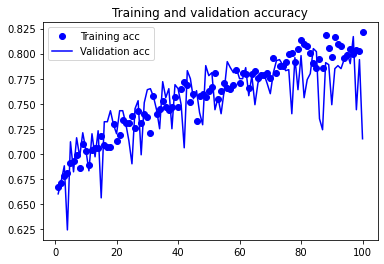

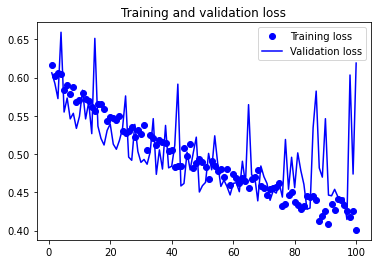

In [39]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [34]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
include_top=False,
input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 9s 0us/step


In [35]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [40]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
base_dir = 'C:/Users/ACER/Downloads/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
    directory,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary')
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

In [41]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [42]:
train_features = np.reshape(train_features, (2000, 4*4* 512))
validation_features = np.reshape(validation_features, (1000, 4*4* 512))
test_features = np.reshape(test_features, (1000, 4*4* 512))

In [43]:
from keras import models
from keras import layers
from keras import optimizers
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(train_features, train_labels,
epochs=30,
batch_size=20,
validation_data=(validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 4s 34ms/step - loss: 0.7039 - acc: 0.5675 - val_loss: 0.4490 - val_acc: 0.8320
Epoch 2/30
100/100 [==============================] - 3s 32ms/step - loss: 0.4479 - acc: 0.8088 - val_loss: 0.3634 - val_acc: 0.8610
Epoch 3/30
100/100 [==============================] - 3s 32ms/step - loss: 0.3646 - acc: 0.8445 - val_loss: 0.3242 - val_acc: 0.8730
Epoch 4/30
100/100 [==============================] - 3s 32ms/step - loss: 0.3226 - acc: 0.8714 - val_loss: 0.3042 - val_acc: 0.8870
Epoch 5/30
100/100 [==============================] - 3s 33ms/step - loss: 0.2883 - acc: 0.8913 - val_loss: 0.2837 - val_acc: 0.8870
Epoch 6/30
100/100 [==============================] - 3s 32ms/step - loss: 0.2617 - acc: 0.8945 - val_loss: 0.2838 - val_acc: 0.8870
Epoch 7/30
100/100 [==============================] - 3s 32ms/step - loss: 0.2373 - acc: 0.9174 - val_loss: 0.2662 - val_acc: 0.8990
Epoch 8/30
100/100 [==============================] - 3s 33ms/step - 

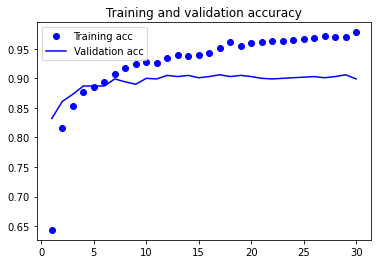

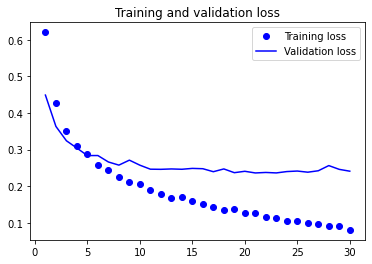

In [44]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [45]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [46]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [47]:
print('This is the number of trainable weights '
'before freezing the conv base:', len(model.trainable_weights))
conv_base.trainable = False
print('This is the number of trainable weights '
'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30
This is the number of trainable weights after freezing the conv base: 4


In [48]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [49]:
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=2e-5),
metrics=['acc'])
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=30,
validation_data=validation_generator,
validation_steps=50)

Epoch 1/30
100/100 [==============================] - 179s 2s/step - loss: 0.6106 - acc: 0.6838 - val_loss: 0.4186 - val_acc: 0.8330
Epoch 2/30
100/100 [==============================] - 180s 2s/step - loss: 0.4734 - acc: 0.7778 - val_loss: 0.3546 - val_acc: 0.8600
Epoch 3/30
100/100 [==============================] - 173s 2s/step - loss: 0.4129 - acc: 0.8182 - val_loss: 0.3174 - val_acc: 0.8760
Epoch 4/30
100/100 [==============================] - 170s 2s/step - loss: 0.3877 - acc: 0.8387 - val_loss: 0.3060 - val_acc: 0.8700
Epoch 5/30
100/100 [==============================] - 170s 2s/step - loss: 0.3893 - acc: 0.8366 - val_loss: 0.2889 - val_acc: 0.8800
Epoch 6/30
100/100 [==============================] - 168s 2s/step - loss: 0.3760 - acc: 0.8335 - val_loss: 0.2842 - val_acc: 0.8800
Epoch 7/30
100/100 [==============================] - 167s 2s/step - loss: 0.3495 - acc: 0.8540 - val_loss: 0.2758 - val_acc: 0.8810
Epoch 8/30
100/100 [==============================] - 174s 2s/step - 

In [50]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [51]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [52]:
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-5),
metrics=['acc'])
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=100,
validation_data=validation_generator,
validation_steps=50)

Epoch 1/100
100/100 [==============================] - 227s 2s/step - loss: 0.3005 - acc: 0.8740 - val_loss: 0.2392 - val_acc: 0.9130
Epoch 2/100
100/100 [==============================] - 208s 2s/step - loss: 0.2596 - acc: 0.8911 - val_loss: 0.2114 - val_acc: 0.9170
Epoch 3/100
100/100 [==============================] - 206s 2s/step - loss: 0.2603 - acc: 0.8926 - val_loss: 0.2096 - val_acc: 0.9120
Epoch 4/100
100/100 [==============================] - 205s 2s/step - loss: 0.2133 - acc: 0.9082 - val_loss: 0.2364 - val_acc: 0.9050
Epoch 5/100
100/100 [==============================] - 205s 2s/step - loss: 0.2028 - acc: 0.9126 - val_loss: 0.2022 - val_acc: 0.9240
Epoch 6/100
100/100 [==============================] - 204s 2s/step - loss: 0.1966 - acc: 0.9227 - val_loss: 0.1837 - val_acc: 0.9280
Epoch 7/100
100/100 [==============================] - 207s 2s/step - loss: 0.1729 - acc: 0.9307 - val_loss: 0.1961 - val_acc: 0.9300
Epoch 8/100
100/100 [==============================] - 216s 2s

KeyboardInterrupt: 

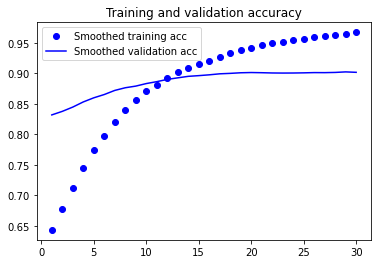

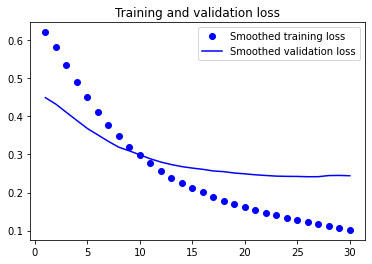

In [54]:
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
plt.plot(epochs,
smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,
smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [55]:
test_generator = test_datagen.flow_from_directory(
test_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.


C:\Users\ACER\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


test acc: 0.9190000295639038


In [57]:
from keras.models import load_model
model = load_model('cats_and_dogs_small_2.h5')
model.summary() 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [61]:
img_path = 'C:/Users/ACER/Downloads/test1/23.jpg'
from keras.preprocessing import image
import numpy as np
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

print(img_tensor.shape)

(1, 150, 150, 3)


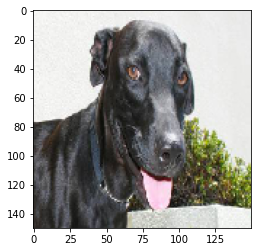

In [62]:
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

In [63]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [64]:
activations = activation_model.predict(img_tensor)

In [65]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


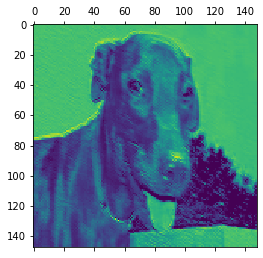

In [66]:
import matplotlib.pyplot as plt
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

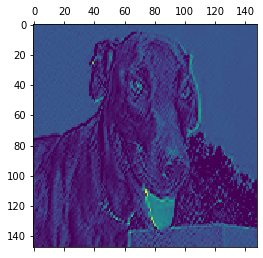

In [67]:
plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')

<ipython-input-69-eb0609cab15f>:14: RuntimeWarning: invalid value encountered in true_divide
  channel_image /= channel_image.std()


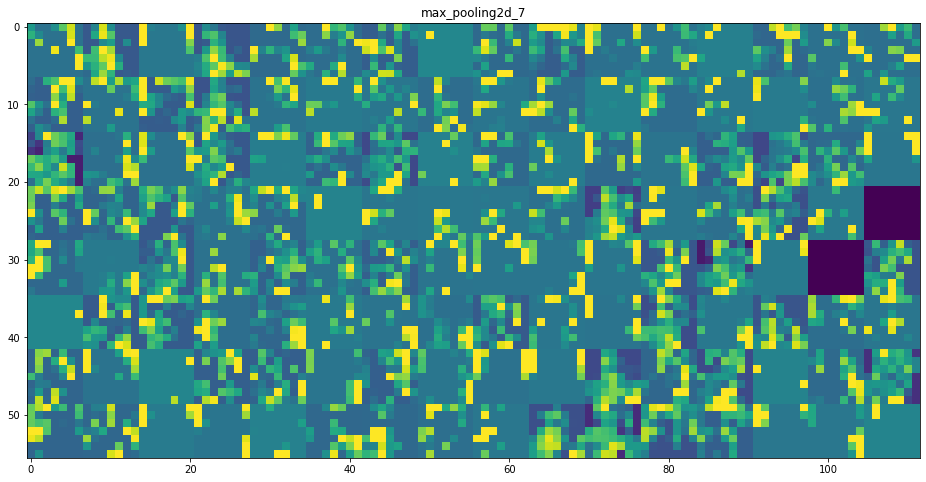

In [69]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :,col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
            row * size : (row + 1) * size] = channel_image
scale = 1. / size
plt.figure(figsize=(scale * display_grid.shape[1],
scale * display_grid.shape[0]))
plt.title(layer_name)
plt.grid(False)
plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [78]:
from keras.applications import VGG16
from keras import backend as K

model = VGG16(weights='imagenet',
include_top=False)
layer_name = 'block3_conv1'
filter_index = 0
layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

In [79]:
grads = K.gradients(loss, model.input)[0]

In [80]:
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

In [81]:
iterate = K.function([model.input], [loss, grads])
import numpy as np
loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])

In [83]:
input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128.
step = 1.
for i in range(40):
    loss_value, grads_value = iterate([input_img_data])
    input_img_data += grads_value * step

In [84]:
def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    x += 0.5
    x = np.clip(x, 0, 1)
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [86]:
def generate_pattern(layer_name, filter_index, size=150):
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])
    grads = K.gradients(loss, model.input)[0]
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    iterate = K.function([model.input], [loss, grads])
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        img = input_img_data[0]
    return deprocess_image(img)

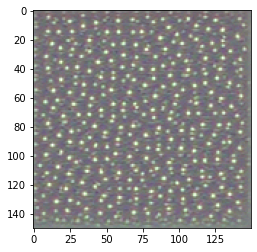

In [87]:
plt.imshow(generate_pattern('block3_conv1', 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


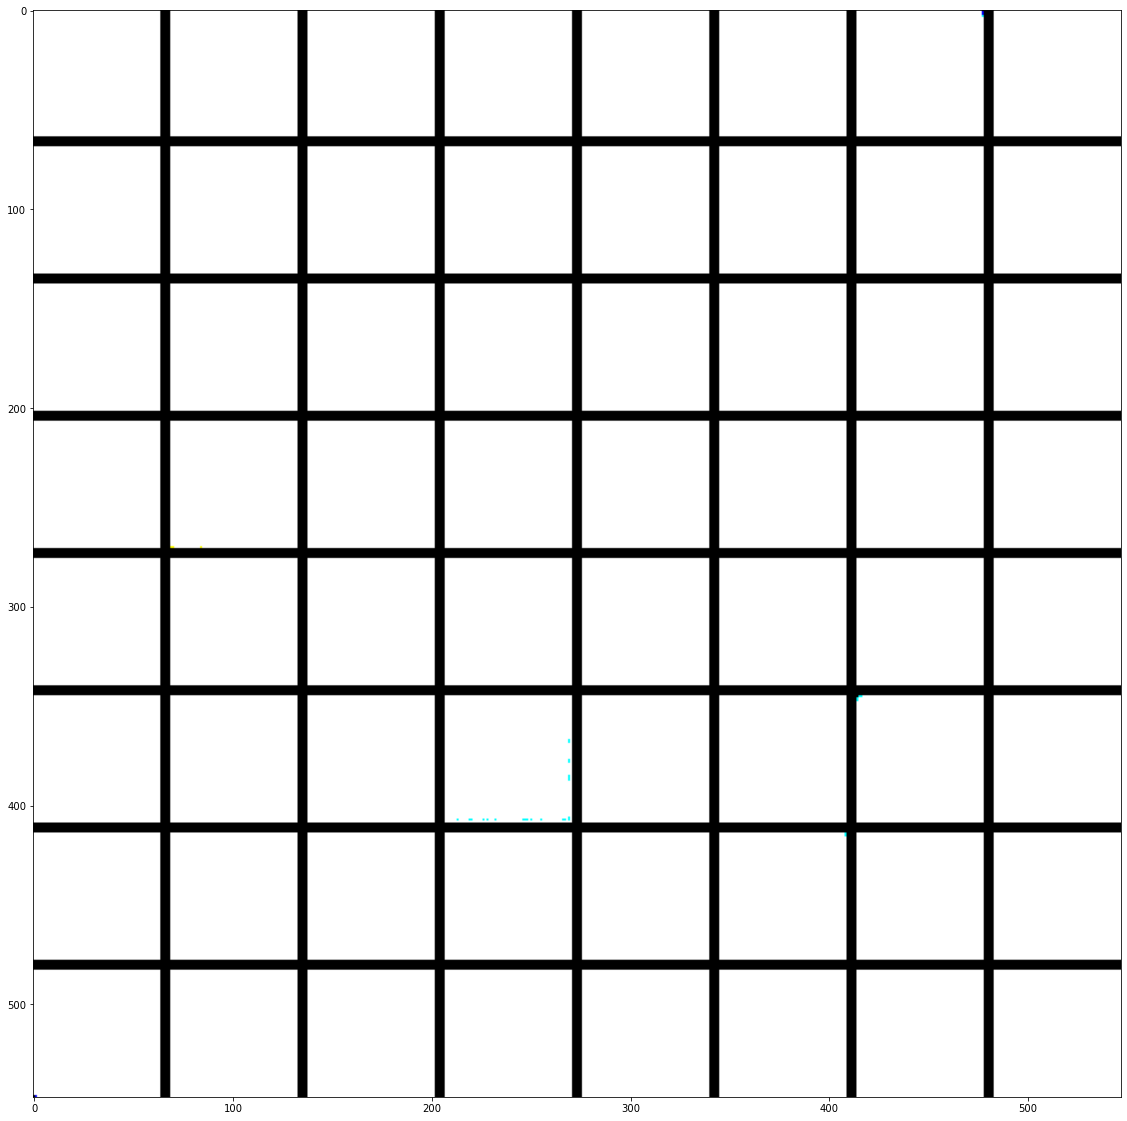

In [89]:
layer_name = 'block1_conv1'
size = 64
margin = 5
results = np.zeros((8 * size+7* margin, 8 * size+7* margin, 3))
for i in range(8):
    for j in range(8):
        filter_img = generate_pattern(layer_name, i + (j * 8), size=size)
        horizontal_start = i * size + i * margin
        horizontal_end = horizontal_start + size
        vertical_start = j * size + j * margin
        vertical_end = vertical_start + size
        results[horizontal_start: horizontal_end,
        vertical_start: vertical_end, :] = filter_img
plt.figure(figsize=(20, 20))
plt.imshow(results)

In [90]:
from keras.applications.vgg16 import VGG16
model = VGG16(weights='imagenet')

553467904/553467096 [==============================] - 2104s 4us/step


In [91]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
img_path = 'C:/Users/ACER/Downloads/test1/50.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [92]:
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

C:\Users\ACER\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


40960/35363 [==================================] - 0s 3us/step
Predicted: [('n02105855', 'Shetland_sheepdog', 0.167318), ('n02110185', 'Siberian_husky', 0.11742018), ('n02106166', 'Border_collie', 0.039714873)]


In [93]:
np.argmax(preds[0])

230

In [95]:
cat = model.output[:, 386]
last_conv_layer = model.get_layer('block5_conv3')
grads = K.gradients(cat, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input],
[pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    heatmap = np.mean(conv_layer_output_value, axis=-1)

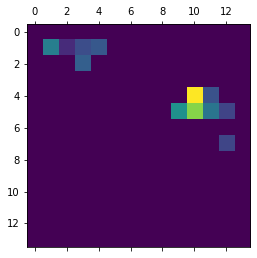

In [96]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)

In [100]:
import cv2
img = cv2.imread(img_path)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = heatmap * 0.4 + img
cv2.imwrite('C:/Users/ACER/Downloads/test1/50.jpg', superimposed_img)


True

In [102]:
cv2.imshow('image', 'C:/Users/ACER/Downloads/test1/50.jpg')

TypeError: Expected Ptr<cv::UMat> for argument 'mat'